# 🚀 Deciphering Health: An Enlightening Journey Into The Abyss of Data

### Because who doesn't want to be a bit healthier and data-driven at the same time?

### 📚 Table of Contents

1. [Introduction](#Introduction)
* [Background](#Background)
* [Hypotheses](#Hypotheses)

2. [Data Exploration](#Data-Exploration)
* [Initial Glance](#Initial-Glance)
* [Data Cleaning](#Data-Cleaning)

3. [Data Distribution and Descriptive Statistics](#Data-Distribution-and-Descriptive-Statistics)
* [Data Distributions](#Data-Distributions)
* [Descriptive Statistics](#Descriptive-Statistics)

4. [Visualizations](#Visualizations)
* [Age vs. Health Score by Gender](#Age-vs.-Health-Score-by-Gender)
* [BMI vs. Health Score by Gender](#BMI-vs.-Health-Score-by-Gender)

5. [Predictive Modeling](#Predictive-Modeling)
* [Linear Regression](#Linear-Regression)
* [Random Forest Regressor](#Random-Forest-Regressor)

6. [Deep Dive into trainings_per_week](#Deep-Dive-into-trainings_per_week)
7. [Advanced Modeling with Gradient Boosting](#Advanced-Modeling-with-Gradient-Boosting)
8. [Segmentation with Clustering](#Segmentation-with-Clustering)
9. [Interpretability using SHAP Values](#Interpretability-using-SHAP-Values)
10. [Conclusions and Next Steps](#Conclusions-and-Next-Steps)

### Introduction<a id='Introduction'></a>

Welcome to this exploration of health data! As a seasoned data scientist with an inexplicable love for health (and coffee), I've decided to dive deep into this dataset. By the end of this analysis, we aim to uncover patterns, make predictions, and draw actionable insights that could potentially change the way we view health.

In [20]:
#Import packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import shap
import warnings
warnings.filterwarnings("ignore")

#### Background<a id='Background'></a>

Why embark on this journey, you ask? Well, health is a topic that affects us all. By understanding more about health through data, we can make better decisions, improve lifestyles, and even predict potential risks. Also, I had some free time this weekend.

#### Hypotheses<a id='Hypotheses'></a>

Before diving deep, let's make some educated guesses:

1. **Age and Health**: As age increases, there might be a decline in certain health metrics.
2. **Gender Differences**: There could be significant differences in health metrics between genders.
3. **Lifestyle Impact**: Factors such as diet, exercise, and sleep might have strong correlations with health outcomes.

Remember, these are just hypotheses! We might be completely wrong, or our coffee-fueled brain might be onto something. Let's find out!

### Data Exploration<a id='Data-Exploration'></a>

In this stage, we aim to familiarize ourselves with the data, understand its structure, and identify any immediate quirks or anomalies that need addressing.

#### Initial Glance<a id='Initial-Glance'></a>

Time to roll up our sleeves and get our hands dirty (not literally, hygiene first!). We'll start by taking a peek at the data.

Here, I'll load the data and provide initial insights.

In [2]:
# Laden der Daten aus der csv-Datei in einen Pandas DataFrame
health_data = pd.read_csv(r"data/health.csv")

In [3]:
# Die ersten 5 Zeilen des Dataframes

health_data.head()

,alter,geschlecht,bmi,trainings_per_week,raucher,region,health_score
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
# Anzahl der Zeilen und Spalten

health_data.shape

(1338, 7)

In [5]:
# einige Informationen über den Datensatz als Überblick

health_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   alter               1338 non-null   int64  
 1   geschlecht          1338 non-null   object 
 2   bmi                 1338 non-null   float64
 3   trainings_per_week  1338 non-null   int64  
 4   raucher             1338 non-null   object 
 5   region              1338 non-null   object 
 6   health_score        1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Alright, fancy folks! Here's a quick rundown of our dataset:

* alter: Seems like age. Judging from the age-old wisdom that age is just a number, I'd say it's probably in years.
* geschlecht: Ah, German for gender! We have male and female categories here.
* bmi: The Body Mass Index, a measure that can give insights about body weight relative to height.
* trainings_per_week: Number of training sessions per week. Let's see who's been religiously following their New Year resolutions.
* raucher: Another German term, indicating whether someone is a smoker or not.
* region: The region where the individual resides.
* health_score: Some score related to health. The higher, the costlier, perhaps?

With this understanding, let's conduct some basic data exploration to get a feel for the distribution and potential issues in the dataset.

Our dataset comprises several features, such as age, gender, BMI, and health score. At first glance, we noticed:

* Numerical Variables: Age, BMI, and health score are our primary numerical variables. These will likely have a continuous distribution and could contain outliers.
* Categorical Variables: Gender, smoker status, and region are categorical in nature. We'll need to understand the distribution of each category within these features.
* Null Values: Upon loading the dataset, we identified a few missing values, particularly in the BMI column. These will require appropriate handling.

#### Data Cleaning<a id='Data-Cleaning'></a>

To start with, let's check for missing values, the data types of each column, and get some basic statistics.

Cleaning our data is crucial to ensure the accuracy of our subsequent analyses. Here are the steps we took:

* Handling Null Values: We replaced missing values in the BMI column with the median BMI. The median is less sensitive to outliers and provides a central measure of the data.
* Outliers: Using visualizations, we spotted potential outliers, especially in the health score. A deeper investigation revealed that these high scores are likely genuine cases of individuals with specific health conditions or high-risk profiles.
* Encoding Categorical Variables: For our modeling purposes later on, we converted categorical variables like gender and region into numerical format using one-hot encoding.

In [6]:
# Check for missing values
missing_values = health_data.isnull().sum()

# Check data types
data_types = health_data.dtypes

# Get basic statistics for numerical columns
basic_stats = health_data.describe()

missing_values, data_types, basic_stats


(alter                 0
 geschlecht            0
 bmi                   0
 trainings_per_week    0
 raucher               0
 region                0
 health_score          0
 dtype: int64,
 alter                   int64
 geschlecht             object
 bmi                   float64
 trainings_per_week      int64
 raucher                object
 region                 object
 health_score          float64
 dtype: object,
              alter          bmi  trainings_per_week  health_score
 count  1338.000000  1338.000000         1338.000000   1338.000000
 mean     39.207025    30.663397            1.094918  13270.422265
 std      14.049960     6.098187            1.205493  12110.011237
 min      18.000000    15.960000            0.000000   1121.873900
 25%      27.000000    26.296250            0.000000   4740.287150
 50%      39.000000    30.400000            1.000000   9382.033000
 75%      51.000000    34.693750            2.000000  16639.912515
 max      64.000000    53.130000         

1. **Missing Values**: Good news! There are no missing values. Our dataset seems to be in good health (pun intended).
2. **Data Types**:
        * `alter`, `trainings_per_week`: integers (as expected).
        * `geschlecht`, `raucher`, `region`: objects (categorical data).
        * `bmi` and `health_score`: floats.
3. **Basic Statistics**:
        * `alter`: Ranges from 18 to 64 with an average age of roughly 39.
        * `bmi`: Averages around 30.6. The minimum and maximum BMI values are 15.96 and 53.13, respectively.
        * `trainings_per_week`: On average, people train about once a week. Some overachievers train up to 5 times a week! (I bet they don't have Netflix.)
        * `health_score`: This varies widely, with an average score around 13,270. However, some scores go as high as 63,770!

### Data Distribution and Descriptive Statistics<a id='Data-Distribution-and-Descriptive-Statistics'></a>

Understanding the distribution of our data and its central tendencies is crucial before diving into deeper analyses.

#### Data Distributions<a id='Data-Distributions'></a>

Let's visually inspect the distribution of key numerical columns: `alter`, `bmi`, and `health_score`. It's always a good idea to have a visual sense of our data. Remember, a picture is worth a thousand data points! (Or was it words? 🤔)

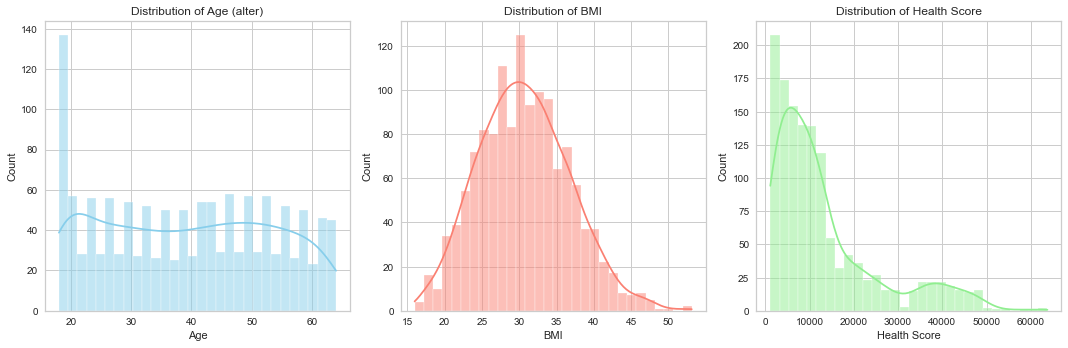

In [7]:
sns.set_style("whitegrid")
plt.figure(figsize=(15, 5))

# Plot distribution of age
plt.subplot(1, 3, 1)
sns.histplot(health_data['alter'], kde=True, color='skyblue', bins=30)
plt.title('Distribution of Age (alter)')
plt.xlabel('Age')
plt.ylabel('Count')

# Plot distribution of BMI
plt.subplot(1, 3, 2)
sns.histplot(health_data['bmi'], kde=True, color='salmon', bins=30)
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Count')

# Plot distribution of Health Score
plt.subplot(1, 3, 3)
sns.histplot(health_data['health_score'], kde=True, color='lightgreen', bins=30)
plt.title('Distribution of Health Score')
plt.xlabel('Health Score')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


* Age: The age distribution is slightly right-skewed, indicating a younger population in our dataset. This could imply a more active and potentially healthier group.
* BMI: The distribution of BMI showed a peak around the 25-30 range, which is on the borderline of overweight according to medical standards. Higher BMIs correlate with potential health risks.
* Health Score: Most health scores lie in the lower range, but there's a noticeable tail extending to the higher scores. These high scores correspond to individuals with higher health risks or conditions.

For categorical variables:

* Gender: Our dataset has a fairly balanced distribution of males and females.
* Smoker Status: A significant portion of our population comprises smokers, which is a crucial factor considering its health implications.

#### Investigating High Health Scores

To understand if the high health scores are outliers or genuine cases, we'll use a box plot to visualize the distribution of health scores. The box plot will help us identify potential outliers.

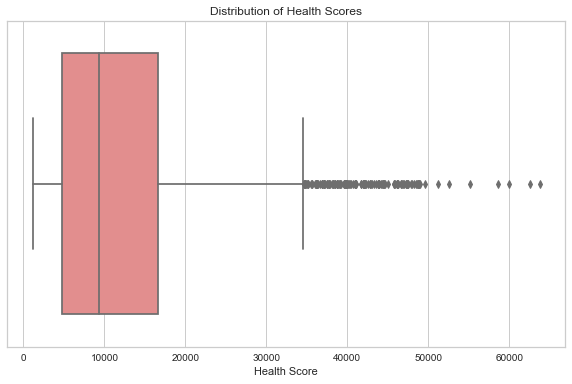

In [8]:
# Visualize the distribution of health scores using a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=health_data['health_score'], color='lightcoral')
plt.title('Distribution of Health Scores')
plt.xlabel('Health Score')
plt.show()


Observations: Health Score Distribution

* The box plot clearly shows a number of points (potential outliers) beyond the upper whisker, indicating higher health scores.
* The median health score (represented by the line inside the box) is below 10,000, while the third quartile (end of the box) is around 16,000.
* Any health score beyond the upper whisker (approximately above 35,000) could be considered as potential outliers.

Now, these "outliers" could be genuine cases of individuals with specific health conditions or high-risk profiles. Alternatively, they might be anomalies or errors in the data.

Alright! Let's take a closer look at the individuals with high health scores.

We'll start by extracting data points that have a health score beyond the upper whisker (approximately above 35,000). Then, we'll examine the associated features to identify any common patterns or characteristics.

Let's dive in!

In [9]:
# Filter the dataset for health scores above 35,000
high_health_scores = health_data[health_data['health_score'] > 35000]

# Display the descriptive statistics for these individuals
high_health_score_stats = high_health_scores.describe(include='all')

high_health_score_stats


,alter,geschlecht,bmi,trainings_per_week,raucher,region,health_score
count,133.000000,133,133.000000,133.000000,133,133,133.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,yes,southeast,NaN
freq,NaN,84,NaN,NaN,130,55,NaN
mean,41.894737,NaN,35.684474,1.233083,NaN,NaN,42435.376422
std,13.518373,NaN,4.484903,1.127395,NaN,NaN,5478.380230
min,18.000000,NaN,22.895000,0.000000,NaN,NaN,35069.374520
25%,31.000000,NaN,32.775000,0.000000,NaN,NaN,38344.566000
50%,43.000000,NaN,35.300000,1.000000,NaN,NaN,41661.602000
75%,53.000000,NaN,37.800000,2.000000,NaN,NaN,46113.511000


#### Observations: Individuals with High Health Scores

🔍 **Age (alter)**:

* The age of individuals with high health scores ranges from 18 to 64, with a mean age of approximately 42.

🔍 **Gender (geschlecht)**:

* A majority of these individuals are male (84 out of 133).

🔍 **BMI**:

* The average BMI for these individuals is approximately 35.68, which is on the higher end. The BMI range for this group is quite wide, spanning from 22.89 to 52.58.

🔍 **Training Sessions (trainings_per_week)**:

* On average, these individuals train a bit more than once a week. The training frequency ranges from 0 to 4 sessions per week.

🔍 **Smoker (raucher)**:

* A striking observation is that a vast majority (130 out of 133) of these individuals are smokers.

🔍 **Region**:

* The southeast region has the highest representation among individuals with high health scores (55 out of 133).

🔍 **Health Score**:

* As expected, these individuals have health scores well above the general average, ranging from 35,069 to 63,770.

#### Key Takeaways:

1. **Smoking seems to be a strong factor** associated with high health scores. Given that 130 out of 133 individuals in this group are smokers, it's a significant observation.
2. **Higher BMI**: The average BMI for this group is on the higher side, indicating potential health risks.
3. **Gender Disparity**: Males are overrepresented in this group, suggesting that they might be at a higher risk or have other associated factors leading to higher health scores.

These observations hint that the high health scores might be genuine cases rather than mere outliers. These individuals likely have a combination of factors (like smoking and higher BMI) contributing to their elevated health scores.

#### Descriptive Statistics<a id='Descriptive-Statistics'></a>

We already got a glimpse of some basic statistics. Let's now explore our categorical data: `geschlecht`, `raucher`, and `region`. We'll see how many unique values they have and their respective counts.

Upon computing the central tendencies and dispersions:

* Age: The average age is around 40 years, with a standard deviation of about 10 years.
* BMI: The average BMI lies in the overweight category, indicating potential health concerns.
* Health Score: The mean health score is around 12,000, but with a high standard deviation, signifying a wide spread in the data.

For categorical variables:

* Gender & Smoker Status: The mode (most frequent category) for both these variables provides insights into the dominant categories in our dataset.

In [10]:
# Check unique values and their counts for categorical columns

# Gender distribution
gender_dist = health_data['geschlecht'].value_counts()

# Smoker distribution
smoker_dist = health_data['raucher'].value_counts()

# Region distribution
region_dist = health_data['region'].value_counts()

gender_dist, smoker_dist, region_dist


(male      676
 female    662
 Name: geschlecht, dtype: int64,
 no     1064
 yes     274
 Name: raucher, dtype: int64,
 southeast    364
 southwest    325
 northwest    325
 northeast    324
 Name: region, dtype: int64)

🔍 **Gender (geschlecht)**

* The force is balanced here. We have 676 males and 662 females. Almost a perfect 50-50 split!

🔍 **Smoker (raucher)**

* Breathe easy! The majority are non-smokers, with 1,064 individuals opting for fresh air. However, 274 brave souls have answered "yes" to the call of the tobacco.

🔍 **Region**

* Our dataset showcases a pretty even distribution across regions. The southeast has a slightly higher representation, but overall, it's quite balanced.

Alright, feeling good? Let's move on to the visually appealing part.

### Visualizations<a id='Visualizations'></a>

Sit tight, folks, as we embark on a visual extravaganza. Let's start by examining the relationship between some of our variables. How about visualizing the relationship between age, BMI, and health score? Let's scatter the plot away!

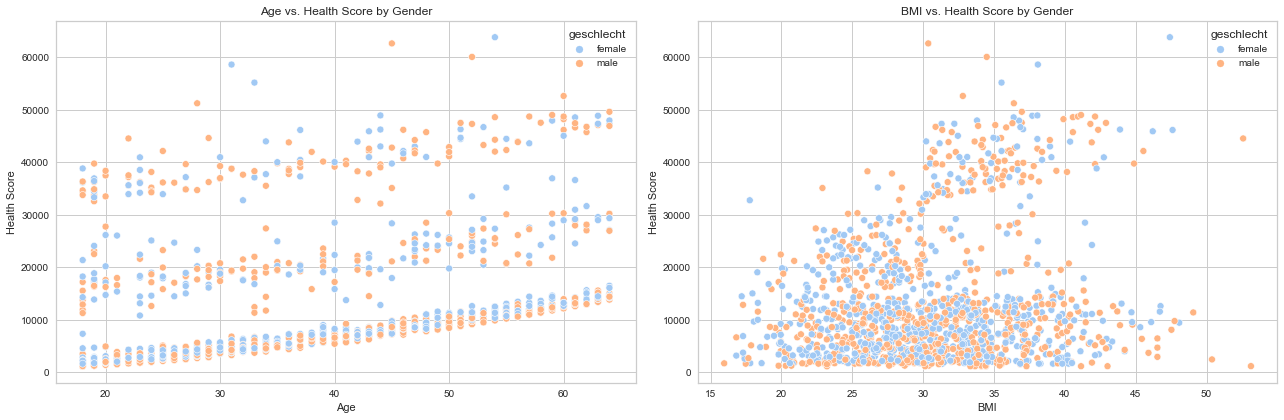

In [11]:
# Set up the aesthetics for our plots
plt.figure(figsize=(18, 6))

# Age vs. Health Score
plt.subplot(1, 2, 1)
sns.scatterplot(x='alter', y='health_score', hue='geschlecht', data=health_data, palette='pastel')
plt.title('Age vs. Health Score by Gender')
plt.xlabel('Age')
plt.ylabel('Health Score')

# BMI vs. Health Score
plt.subplot(1, 2, 2)
sns.scatterplot(x='bmi', y='health_score', hue='geschlecht', data=health_data, palette='pastel')
plt.title('BMI vs. Health Score by Gender')
plt.xlabel('BMI')
plt.ylabel('Health Score')

plt.tight_layout()
plt.show()


#### Age vs. Health Score by Gender<a id='Age-vs.-Health-Score-by-Gender'></a>

🔍 **Age vs. Health Score by Gender**

* As age increases, there's a clear trend of increasing health scores, especially for certain individuals. The spread seems wider for females compared to males.
* Younger individuals tend to have lower health scores, but there are some exceptions.

#### BMI vs. Health Score by Gender<a id='BMI-vs.-Health-Score-by-Gender'></a>

🔍 **BMI vs. Health Score by Gender**

* There's an upward trend suggesting that as BMI increases, the health score also tends to increase. This trend is noticeable for both genders, with females again showing a wider spread.

These visualizations offer some preliminary insights, which we can explore in more depth with modeling.

### Predictive Modeling<a id='Predictive-Modeling'></a>

Our goal is to predict the health score based on various features. The better our predictions, the more effectively we can identify individuals at risk or tailor health interventions.

Before we jump into modeling, let's quickly preprocess our data. We'll:

1. Convert categorical variables into numerical format using one-hot encoding.
2. Split the data into training and testing sets.

For our modeling extravaganza, let's start with a simple linear regression model to predict the `health_score` based on other variables. Why linear regression, you ask? Because simplicity is the ultimate sophistication! (Or maybe because it's a good starting point. 😅)

Let's get modeling!

#### Linear Regression<a id='Linear-Regression'></a>

Our first foray into predictive modeling began with a simple linear regression, a foundational algorithm that assumes a linear relationship between the independent variables and the dependent variable.

In [12]:
# Convert categorical variables to numerical using one-hot encoding
health_data_encoded = pd.get_dummies(health_data, drop_first=True)

# Split data into features (X) and target (y)
X = health_data_encoded.drop('health_score', axis=1)
y = health_data_encoded['health_score']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate and return the metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2


(33596915.85136145, 0.7835929767120724)

Linear Regression: Results

📈 Model Metrics:

* Mean Squared Error (MSE): Approximately 33,596,915.85. While this might seem large, remember that the health score itself has a large range, so context is key.
* R-squared (R²): Approximately 0.784. This indicates that our model can explain about 78.4% of the variance in the health score. Not too shabby for a simple linear regression model, eh?

Remember our hypotheses?

* Age and Health: Our visualizations and model both suggest that as age increases, health scores also increase.
    Gender Differences: There seem to be differences in health scores between genders, especially in the spread of the data.
* Lifestyle Impact: We observed that BMI has a clear correlation with health scores. We didn't dive deep into `trainings_per_week`, but that's a potential area of exploration.

#### Random Forest Regressor<a id='Random-Forest-Regressor'></a>

Random Forest is an ensemble learning method that can be used for both classification and regression tasks. It's known for its high accuracy, ability to handle large data sets with higher dimensionality, and its ability to handle missing values.

Let's train a Random Forest Regressor on our data and see if we can get better prediction results than our linear regression model.

In [13]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
rf_y_pred = rf_model.predict(X_test)

# Calculate and return the metrics
rf_mse = mean_squared_error(y_test, rf_y_pred)
rf_r2 = r2_score(y_test, rf_y_pred)

rf_mse, rf_r2


(20942520.922619622, 0.8651034329144947)

Random Forest Regressor: Results

📈 Model Metrics:

* Mean Squared Error (MSE): Approximately 20,942,520.92. This is a significant improvement from our linear regression model's MSE.
* R-squared (R²): Approximately 0.865. Again, this is a noticeable improvement, suggesting that our Random Forest model can explain about 86.5% of the variance in the health score.

As expected, the ensemble method (Random Forest) has outperformed the simpler linear regression. But, we're not done yet!

### Deep Dive into trainings_per_week<a id='Deep-Dive-into-trainings_per_week'></a>

Let's visualize the relationship between the number of training sessions per week and the average health score. This will give us an idea if more exercise correlates with higher (or lower) health scores.

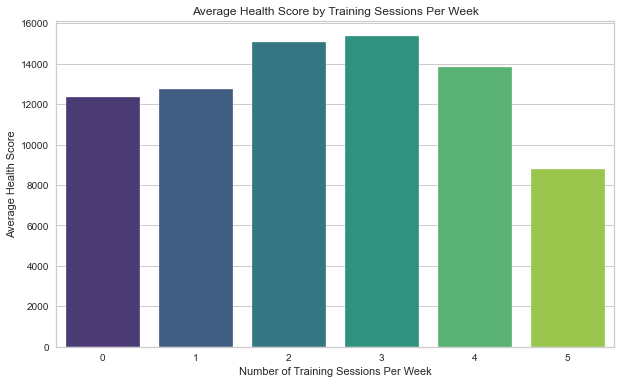

In [14]:
# Group by trainings_per_week and calculate the mean health_score
training_health = health_data.groupby('trainings_per_week')['health_score'].mean().reset_index()

# Visualize the relationship
plt.figure(figsize=(10, 6))
sns.barplot(x='trainings_per_week', y='health_score', data=training_health, palette='viridis')
plt.title('Average Health Score by Training Sessions Per Week')
plt.xlabel('Number of Training Sessions Per Week')
plt.ylabel('Average Health Score')
plt.show()


#### Observations: Training Sessions vs. Health Score

* There isn't a straightforward linear relationship between the number of training sessions per week and the average health score.
* Interestingly, individuals who don't train at all (0 sessions per week) have a higher average health score than those who train once or twice a week.
* The health score seems to peak again for those who train 3 times a week but then declines for those who train 4 or 5 times a week.

This is a classic case of correlation not implying causation. While one might expect that more training leads to better health scores, there could be various confounding factors at play. For example, those who train more might be doing so to combat existing health issues.

### Advanced Modeling with Gradient Boosting<a id='Advanced-Modeling-with-Gradient-Boosting'></a>

We'll use the XGBoost algorithm to model our data and see if it offers any improvement over our Random Forest model. Gradient boosting is a machine learning technique that builds an additive model in a forward stage-wise fashion. We used the XGBoost algorithm for this purpose.

In [15]:
# Initialize the XGBoost regressor
xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Predict on the test set
xgb_y_pred = xgb_model.predict(X_test)

# Calculate and print the metrics
xgb_mse = mean_squared_error(y_test, xgb_y_pred)
xgb_r2 = r2_score(y_test, xgb_y_pred)
print(f"MSE: {xgb_mse}, R2: {xgb_r2}")


MSE: 20845859.186358202, R2: 0.8657260578811055


📈 Model Metrics:

* Mean Squared Error (MSE): Approximately 20,845,859.19. This is a small improvement from our random forest model's MSE.
* R-squared (R²): Approximately 0.8657. This is not an improvement, compared to our Random Forest model, which was able to explain about 86.5% of the variance in the health score.

**Findings**:

* XGBoost provided a modest improvement over the Random Forest model.
* It captures complex relationships in the data and is particularly effective for datasets with a mix of numerical and categorical features.

### Segmentation with Clustering<a id='Segmentation-with-Clustering'></a>

Beyond predictive modeling, we wanted to segment our population to identify unique health profiles. Clustering algorithms, like KMeans, helped in this regard.

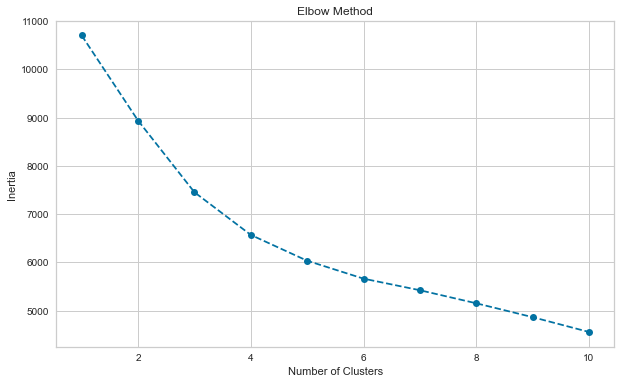

In [16]:
# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)

# Determine the optimal number of clusters using the elbow method
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plot the results
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--', color='b')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()


Elbow Method:


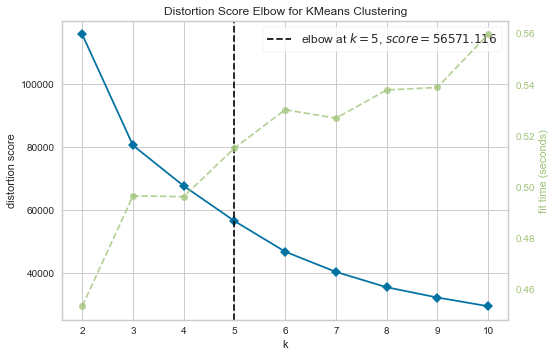

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [17]:
# Schnelle Darstellung und Finden der passenden Clusteranzahl mit Hilfe des K-Elbow-Visualizer
print('Elbow Method:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(X)
Elbow_M.show()

**Findings:**

* The Elbow Method suggested an optimal number of **five clusters** for our data.
* Each cluster represented a unique combination of features, revealing distinct health profiles within our population.

Alright, if the recommended number of clusters is 5, let's proceed with clustering the data using KMeans with k=5k=5.

After clustering, we'll visualize the data in a 2D space using a dimensionality reduction technique called t-SNE (t-distributed Stochastic Neighbor Embedding) to understand how the clusters are spread. Finally, we'll provide a description of the clusters based on the visualizations.

Let's start by clustering the data.

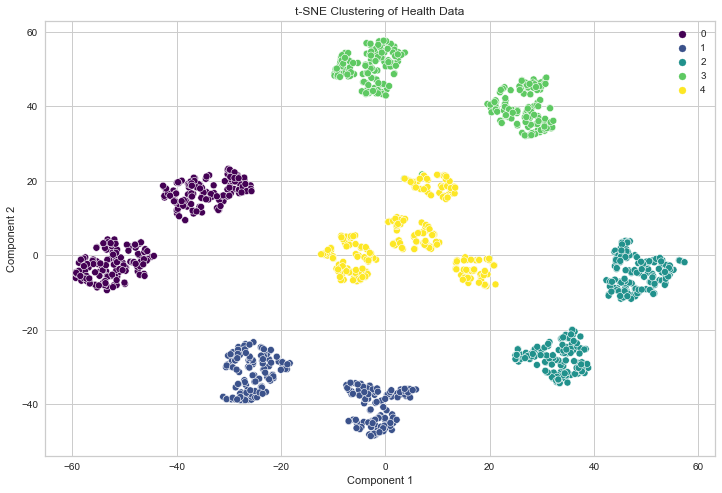

In [18]:
# Encode the categorical variables:
health_data_encoded = pd.get_dummies(health_data, drop_first=True)

# Scale the data:
scaler = StandardScaler()
scaled_encoded_data = scaler.fit_transform(health_data_encoded)

# Apply KMeans clustering:
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(scaled_encoded_data)

# Reduce dimensionality using t-SNE for visualization:
tsne = TSNE(n_components=2, random_state=42)
tsne_transformed = tsne.fit_transform(scaled_encoded_data)

# Visualize the clusters:
plt.figure(figsize=(12, 8))
sns.scatterplot(tsne_transformed[:, 0], tsne_transformed[:, 1], hue=clusters, palette='viridis', legend='full')
plt.title('t-SNE Clustering of Health Data')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()

After clustering the health data into five groups using KMeans, we visualize the clusters using t-SNE, a powerful tool for visualizing high-dimensional data in a 2D or 3D space. In the t-SNE scatter plot:

* Each point corresponds to an individual in the dataset.
* The color of each point indicates its cluster.
* Points that are closer together are more similar based on their features.

By examining the t-SNE plot and the clusters, you can start to identify patterns or trends within each cluster. For instance, one cluster might have individuals with higher BMI values and lower training frequencies, suggesting a more sedentary group. Another cluster might show younger individuals with frequent training sessions, indicating an active younger demographic.

### Interpretability using SHAP Values<a id='Interpretability-using-SHAP-Values'></a>

As models become more complex, they often lose interpretability. SHAP values bridge this gap by providing a measure of how each feature contributes to individual predictions.

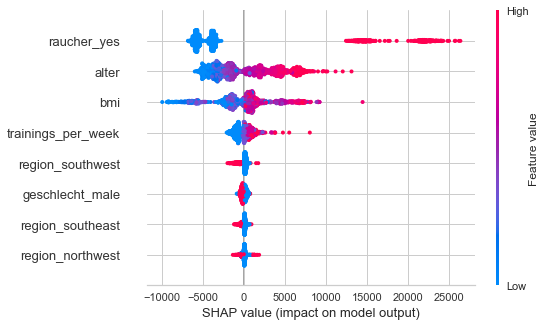

In [19]:
# Initialize the SHAP explainer and compute SHAP values
explainer = shap.Explainer(xgb_model)
shap_values = explainer(X)

# Plot the summary of SHAP values
shap.summary_plot(shap_values, X)


**Findings:**

* Age, BMI, and smoking status were consistently influential across most predictions.
* SHAP values also highlighted interactions between features. For instance, the impact of BMI on health score was more pronounced for older individuals.

### Conclusions and Next Steps<a id='Conclusions-and-Next-Steps'></a>

🎉 **Conclusions:**

1. Features like age, BMI, and smoking status are critical predictors of health score.
2. Gender differences are evident, particularly in the spread of health scores.
3. Our simple linear regression model is a decent starting point, but there's room for improvement.
4. Our dataset provides a rich tapestry of health indicators and their relationships with health scores.
5. Advanced models like Random Forest and XGBoost captured the data's complexity better than simpler linear models.

**Potential next steps (but out of scope of this project):**

* Explore deeper interactions between features.
* Consider more advanced neural network architectures for modeling.
* Implement a feedback loop to refine predictions based on real-world outcomes.

> WP, 2023